Data Transformation

I.Discretization/Binning

1.Equal Width Discretization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
diamond_data = sns.load_dataset('diamonds')

In [ ]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='price', ylabel='Count'>

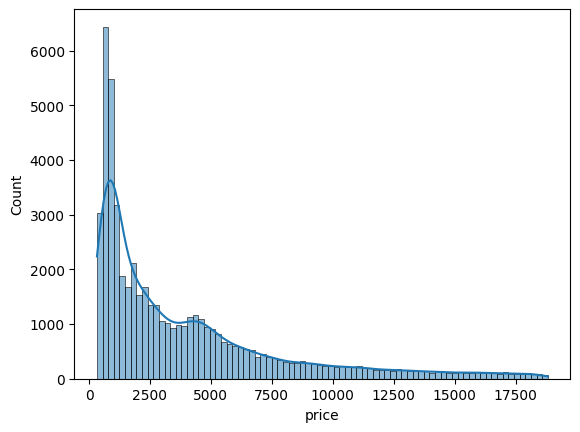

In [ ]:
sns.histplot(diamond_data['price'], kde=True)

In [ ]:
diamond_data['price']

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
np.unique(diamond_data['price'])

array([  326,   327,   334, ..., 18806, 18818, 18823])

In [ ]:
print(diamond_data['price'].max())
print(diamond_data['price'].min())

18823
326


In [ ]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range)

18497


In [ ]:
price_range / 10

1849.7

In [ ]:
lower_interval = int(np.floor(diamond_data['price'].min()))
upper_interval = int(np.ceil(diamond_data['price'].max()))
interval_length = int(np.round(price_range/10))
print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


range(start, stop, step)

In [ ]:
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
total_bins

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]

In [ ]:
326+1850

2176

In [ ]:
bin_labels = ['Bin_no_'+str(i) for i in range(1, len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'],bins=total_bins,labels=bin_labels,include_lowest=False)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,NaN
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,NaN
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'],bins=total_bins,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


In [ ]:
x = diamond_data.groupby('price_bins')
x.first()

,carat,cut,color,clarity,depth,table,price,x,y,z
price_bins,,,,,,,,,,
Bin_no_1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
Bin_no_2,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
Bin_no_3,0.71,Ideal,E,VVS1,61.9,55.0,4027,5.73,5.77,3.56
Bin_no_4,1.06,Ideal,E,SI1,58.8,57.0,5877,6.71,6.66,3.93
Bin_no_5,1.01,Ideal,E,VS1,61.5,57.0,7727,6.47,6.44,3.97
Bin_no_6,1.32,Ideal,G,VS2,61.1,57.0,9580,7.13,7.07,4.34
Bin_no_7,1.62,Very Good,H,VS2,59.6,59.0,11427,7.59,7.67,4.55
Bin_no_8,1.93,Very Good,I,SI1,62.8,58.0,13278,7.89,7.97,4.98
Bin_no_9,2.08,Ideal,I,SI2,62.3,56.0,15132,8.16,8.22,5.10


In [ ]:
y = diamond_data.groupby('price_bins')['price']
y.first()

price_bins
Bin_no_1       326
Bin_no_2      2757
Bin_no_3      4027
Bin_no_4      5877
Bin_no_5      7727
Bin_no_6      9580
Bin_no_7     11427
Bin_no_8     13278
Bin_no_9     15132
Bin_no_10    16985
Name: price, dtype: int64

<Axes: xlabel='price_bins'>

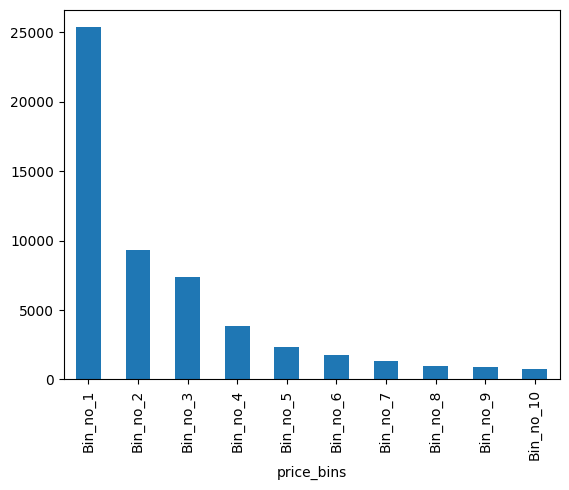

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

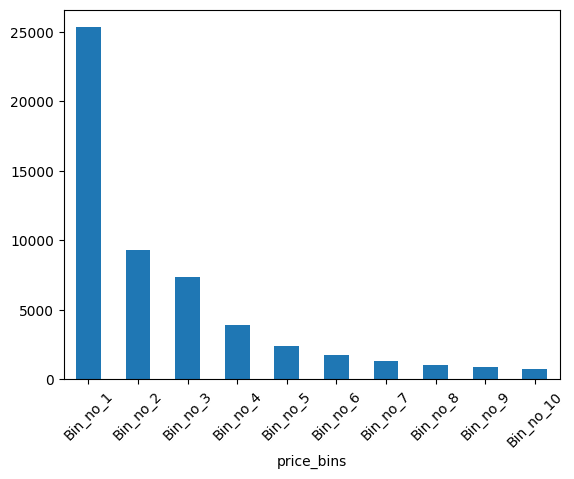

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

2.Equal Frequency Discretization

In [ ]:
discretised_price, bins = pd.qcut(diamond_data['price'],10,labels=None,retbins=True,precision=3,duplicates='raise')
discretised_price

0        (325.999, 646.0]
1        (325.999, 646.0]
2        (325.999, 646.0]
3        (325.999, 646.0]
4        (325.999, 646.0]
               ...       
53935    (2401.0, 3465.0]
53936    (2401.0, 3465.0]
53937    (2401.0, 3465.0]
53938    (2401.0, 3465.0]
53939    (2401.0, 3465.0]
Name: price, Length: 53940, dtype: category
Categories (10, interval[float64, right]): [(325.999, 646.0] < (646.0, 837.0] < (837.0, 1087.0] <
                                            (1087.0, 1698.0] ... (3465.0, 4662.0] <
                                            (4662.0, 6301.2] < (6301.2, 9821.0] < (9821.0, 18823.0]]

In [ ]:
pd.concat([discretised_price, diamond_data['price']], axis=1).head(10)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [ ]:
discretised_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [ ]:
bin_labels = ['Bin_no_' + str(i) for i in range(1,11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'],bins=bins,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

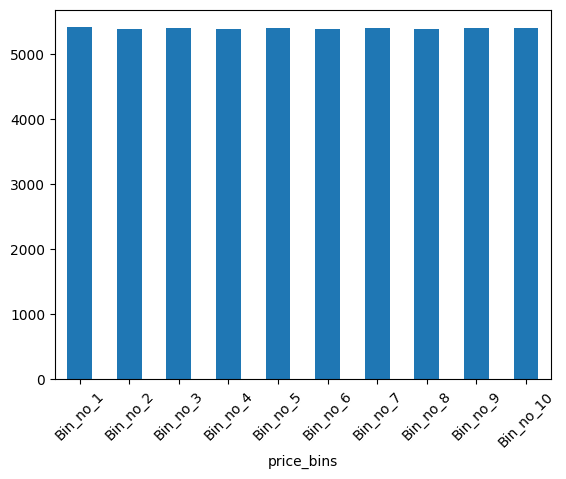

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

3.KMeans Discretisation

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
discretization = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [ ]:
discretization.fit(diamond_data[['price']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [ ]:
intervals = discretization.bin_edges_.tolist()
print(intervals)

[array([  326.        ,  1492.78643064,  2879.05730293,  4308.05906601,
        5843.59336918,  7649.12113784,  9636.73187241, 11747.84144024,
       13992.95066605, 16339.91790883, 18823.        ])]


In [ ]:
intervals = [  326.        ,  1492.78643064,  2879.05730293,  4308.05906601,
        5843.59336918,  7649.12113784,  9636.73187241, 11747.84144024,
       13992.95066605, 16339.91790883, 18823.        ]

In [ ]:
bin_labels = ['Bin_no_' + str(i) for i in range(1,11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'],bins=intervals,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

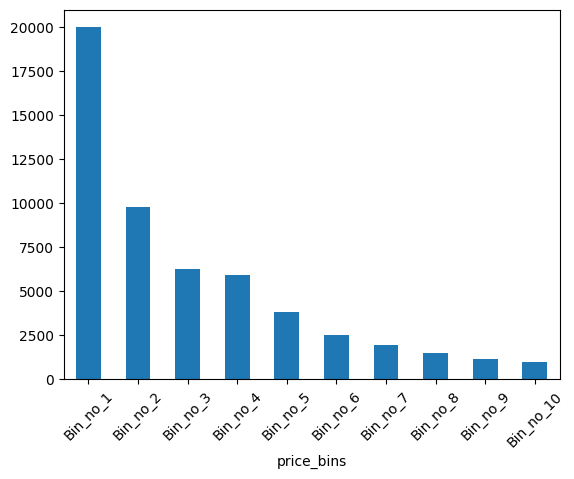

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

II.Feature Scaling

1.Standardization/Z-score Normalization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [ ]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [ ]:
(22-29.699118)/14.526497

-0.5300051347547863

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


II.Min-Max Scaling

In [ ]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [ ]:
(22-0.420000)/(80.000000 - 0.420000)

0.2711736617240513

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


3.Mean Normalisation

In [ ]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [ ]:
(22-29.699118)/(80.000000-0.420000)

-0.09674689620507664

In [ ]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [ ]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [ ]:
titanic_data_scaled = (titanic_data-mean_vals)/range_vals

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.096747,-0.048707,0.345679
1,0.104309,0.076277,-0.654321
2,-0.046483,-0.047390,0.345679
3,0.066611,0.040786,-0.654321
4,0.066611,-0.047146,0.345679


4.Maximum Absolute Scaling

In [ ]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.2750,0.014151,1.000000
1,0.4750,0.139136,0.333333
2,0.3250,0.015469,1.000000
3,0.4375,0.103644,0.333333
4,0.4375,0.015713,1.000000


5.Median and Quantile Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(titanic_data)
titanic_data_scaled = scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.335664,-0.312011,0.0
1,0.559441,2.461242,-2.0
2,-0.111888,-0.282777,0.0
3,0.391608,1.673732,-2.0
4,0.391608,-0.277363,0.0


III.Transformation

a.Log Transformation (skewed distribution)

In [ ]:
attribute = 'fare'
titanic_data['log_' + attribute] = np.log1p(titanic_data[attribute])

b.Reciprocal Transformation

In [ ]:
titanic_data['reciprocal_' + attribute] = 1/(titanic_data[attribute]+1)

c.Square Transformation

In [ ]:
titanic_data['square_' + attribute] = titanic_data[attribute]**2

d.Square Root Transformation

In [ ]:
titanic_data['sqrt_' + attribute] = np.sqrt(titanic_data[attribute])

e.Boxcox Transformation

In [ ]:
from scipy.stats import boxcox
titanic_data['boxcox_' + attribute], _ = boxcox(titanic_data[attribute]+1)

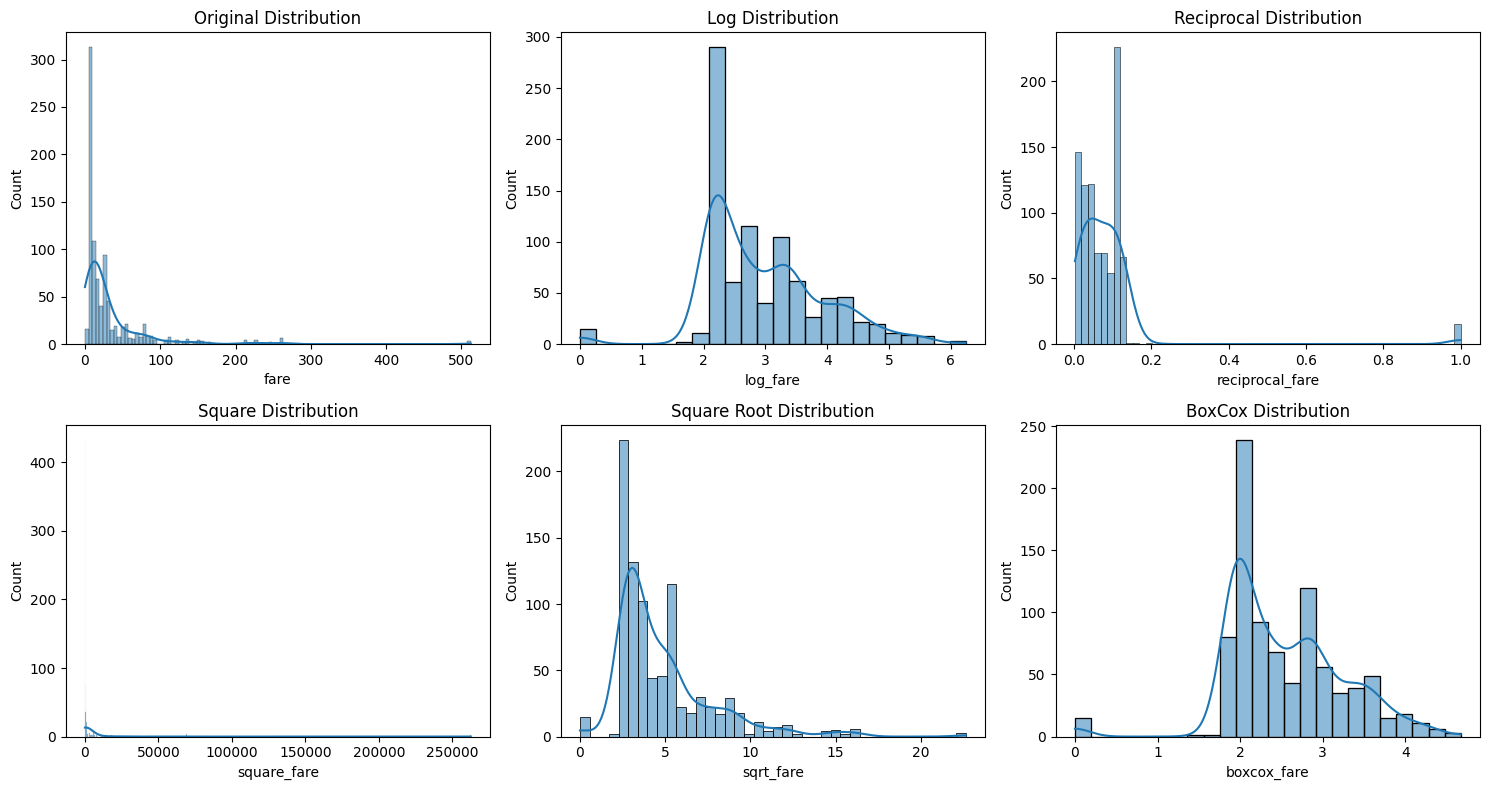

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
sns.histplot(titanic_data[attribute], kde=True, ax=axes[0, 0]).set_title('Original Distribution')
sns.histplot(titanic_data['log_' + attribute], kde=True, ax=axes[0, 1]).set_title('Log Distribution')
sns.histplot(titanic_data['reciprocal_' + attribute], kde=True, ax=axes[0, 2]).set_title('Reciprocal Distribution')
sns.histplot(titanic_data['square_' + attribute], kde=True, ax=axes[1, 0]).set_title('Square Distribution')
sns.histplot(titanic_data['sqrt_' + attribute], kde=True, ax=axes[1, 1]).set_title('Square Root Distribution')
sns.histplot(titanic_data['boxcox_' + attribute], kde=True, ax=axes[1, 2]).set_title('BoxCox Distribution')

plt.tight_layout()
plt.show()